In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('res.pkl', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals_10.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res.pkl', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Chestwall_L,MaxDvh,AtMost,3000,2.04
1,D2cm,MaxDose,AtMost,2400,NaN
2,Esophagus,MaxDvh,AtMost,1880,16.91
3,Lungs,MaxDvh,AtMost,1160,29.19
4,Lungs,MaxDvh,AtMost,1240,19.46
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Rib,MaxDvh,AtMost,3200,0.27
8,Rib,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,2.30


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,SpinalCanal,MaxDose,2080,0.0,NaN,90
1,Esophagus,MaxDose,1880,0.0,NaN,90
2,Heart,MaxDose,2800,0.0,NaN,90
3,GreatVes,MaxDose,4300,0.0,NaN,90
4,Trachea,MaxDose,1560,0.0,NaN,90
5,Bronchus,MaxDose,1560,0.0,NaN,90
6,Rib,MaxDose,3200,0.0,NaN,90
7,Skin,MaxDose,3320,0.0,NaN,90
8,PTV,MaxDose,6240,0.0,NaN,95
9,PTV,MinDose,4800,0.0,NaN,100


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,Chestwall_L,MaxDvh,3000.0,1863.708188,-37.876394
1,D2cm,MaxDose,2400.0,2513.274902,4.719788
2,Esophagus,MaxDvh,1880.0,689.025192,-63.349724
3,Lungs,MaxDvh,1160.0,283.486370,-75.561520
4,Lungs,MaxDvh,1240.0,415.900214,-66.459660
5,PTV,MinDvh,4800.0,4800.132225,0.002755
6,PTV,MaxDose,8000.0,6076.125000,-24.048437
7,Rib,MaxDvh,3200.0,2620.957636,-18.095074
8,Rib,MaxDose,4000.0,3302.385986,-17.440350
9,SpinalCanal,MaxDvh,1360.0,878.595786,-35.397369


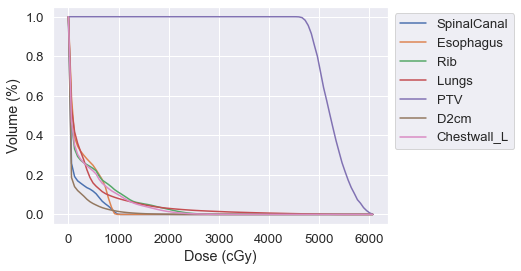

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 393.34, Linear-Quadratic: 371.07
